In [20]:
import numpy as np
from data_loader import *
from utils import *
data_file = "../Data/training_data/training_data_chunk_0.pkl"
data = LoadModRecData(data_file, .9, .1, 0.)


[Data Loader] - Loading Data...
[Data Loader] - Counting Number of Examples in Dataset...
[Data Loader] - Number of Examples in Dataset: 288000
[Data Loader] - [Modulation Dataset] Adding Collects for: 16PSK
[Data Loader] - [Modulation Dataset] Adding Collects for: 2FSK_5KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: 2FSK_75KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: 8PSK
[Data Loader] - [Modulation Dataset] Adding Collects for: AM_DSB
[Data Loader] - [Modulation Dataset] Adding Collects for: AM_SSB
[Data Loader] - [Modulation Dataset] Adding Collects for: APSK16_c34
[Data Loader] - [Modulation Dataset] Adding Collects for: APSK32_c34
[Data Loader] - [Modulation Dataset] Adding Collects for: BPSK
[Data Loader] - [Modulation Dataset] Adding Collects for: CPFSK_5KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: CPFSK_75KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: FM_NB
[Data Loader] - [Modulation Dataset] Adding Collects for: 

(1, 1024) 179
(1, 1024) 117
(1, 1024) 562
(1, 1024) 996
(1, 1024) 491
(1, 1024) 1486
(1, 1024) 80
(1, 1024) 1885
(1, 1024) 1880
(1, 1024) 1731
(1, 1024) 700
(1, 1024) 570
(1, 1024) 1991
(1, 1024) 1553
(1, 1024) 785
(1, 1024) 1230
(1, 1024) 1933
(1, 1024) 830
(1, 1024) 1821
(1, 1024) 477
(1, 1024) 626
(1, 1024) 1745


/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(1, 1024) 1539
(1, 1024) 326


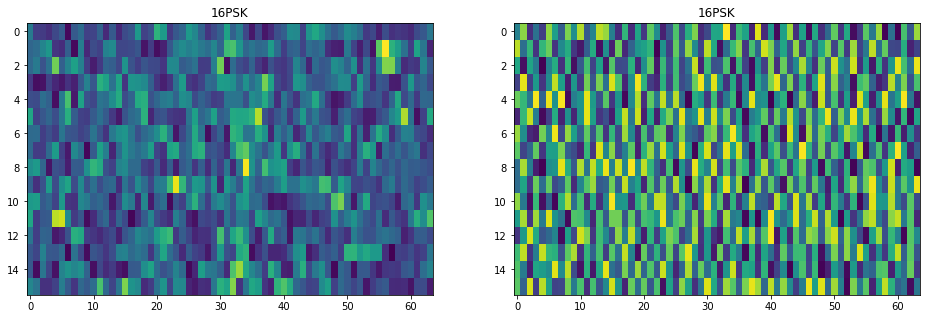

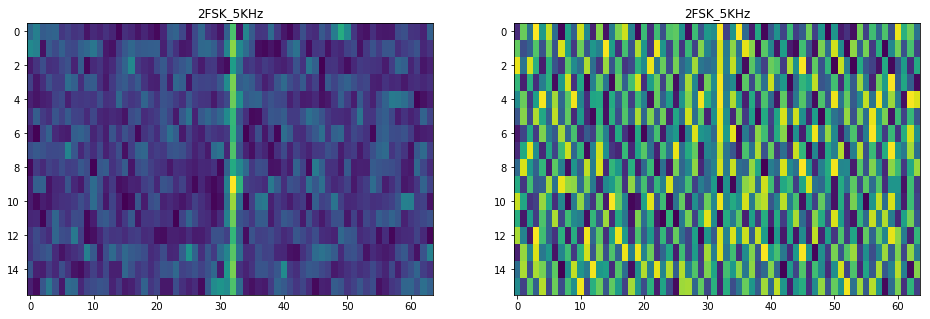

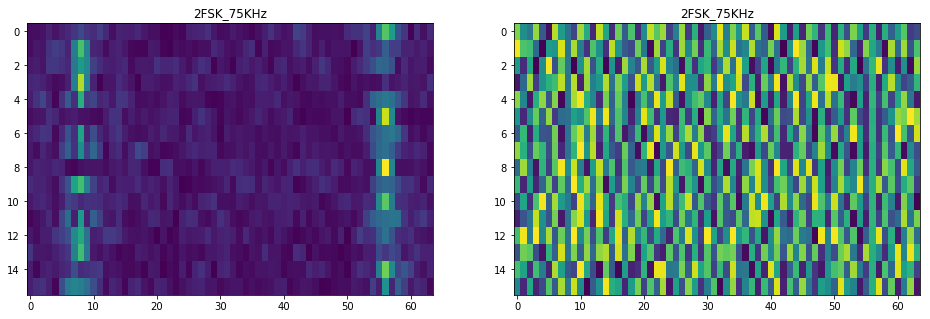

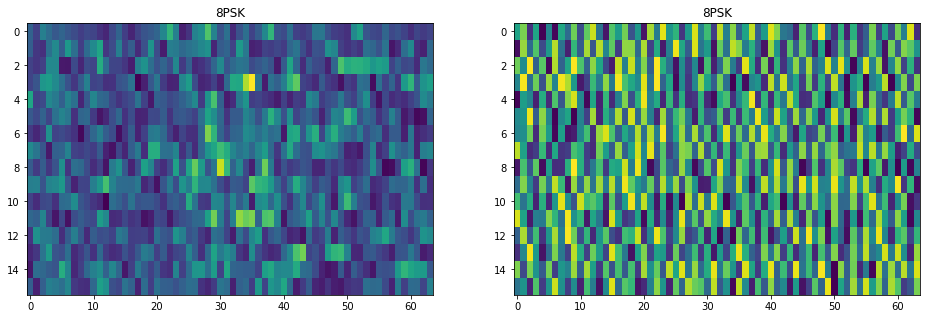

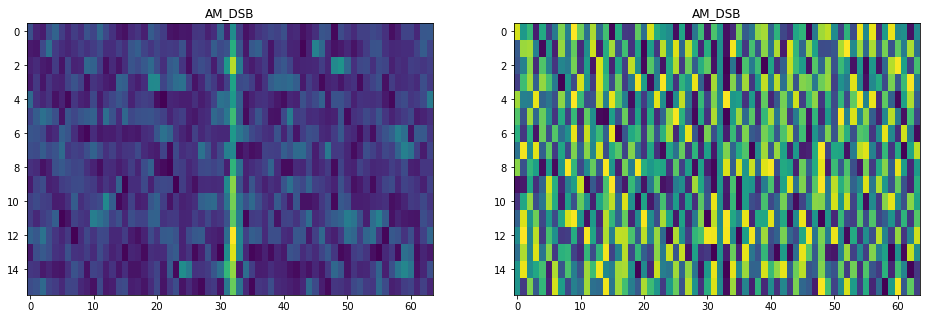

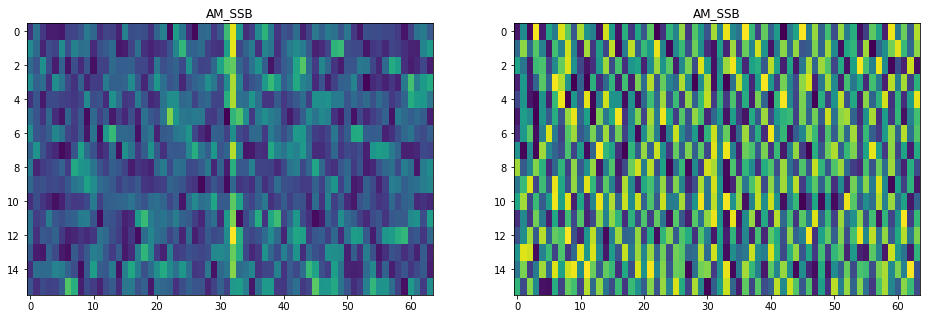

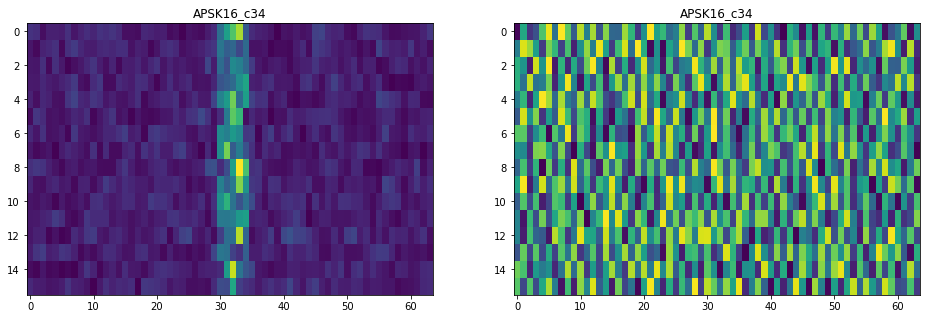

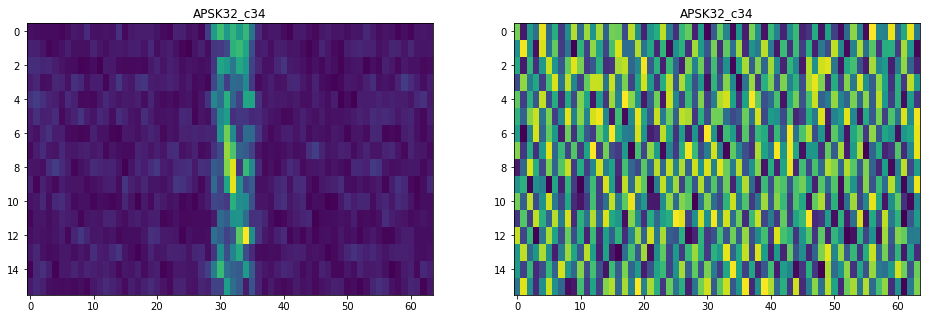

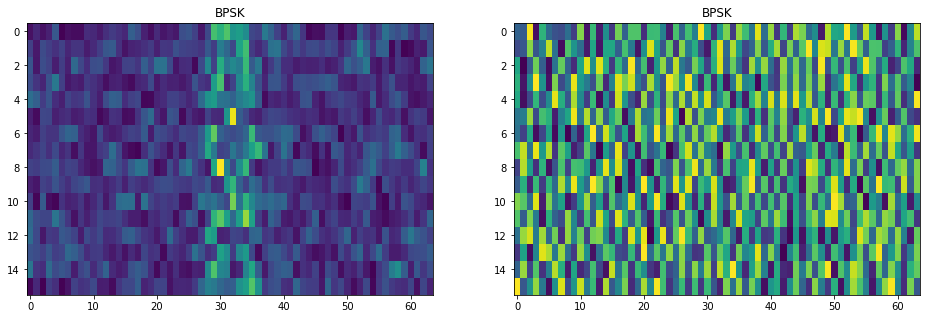

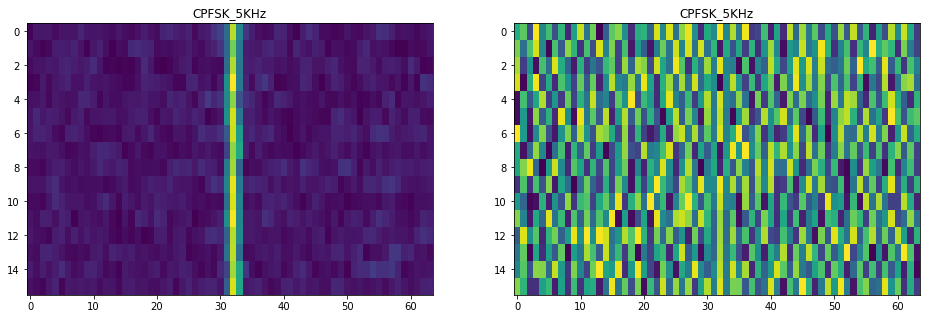

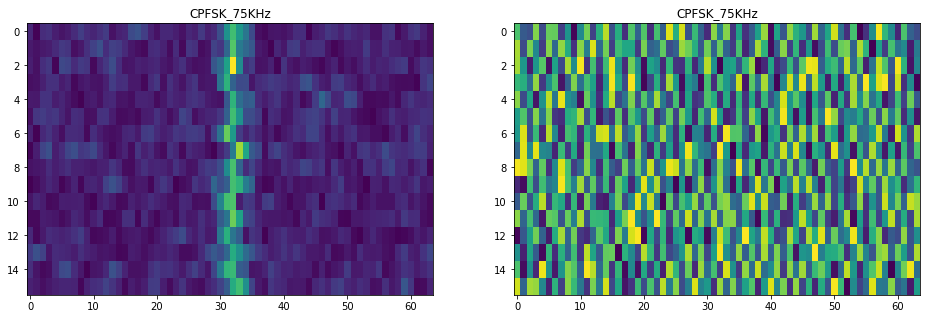

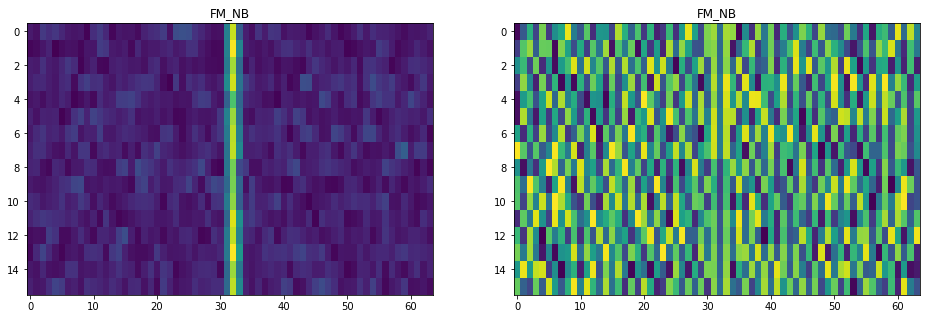

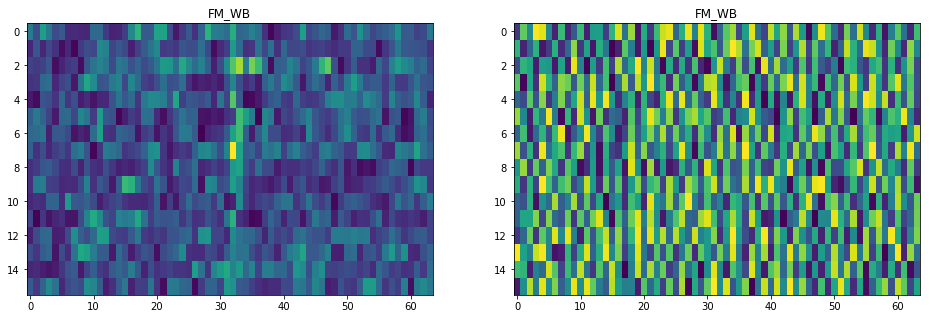

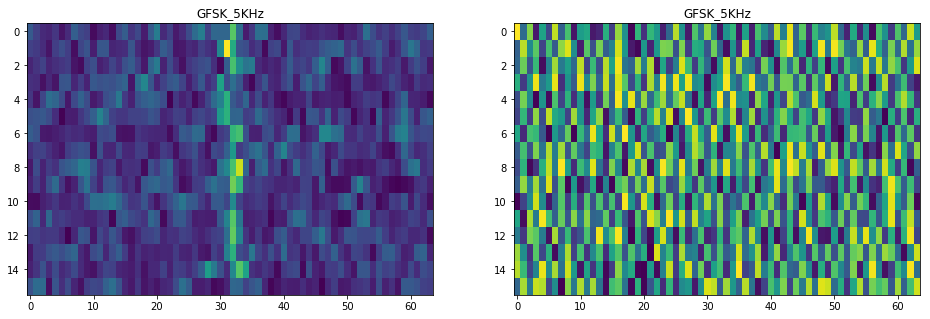

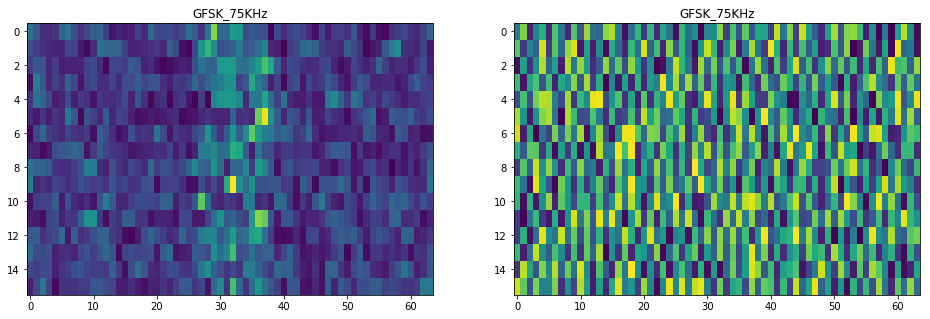

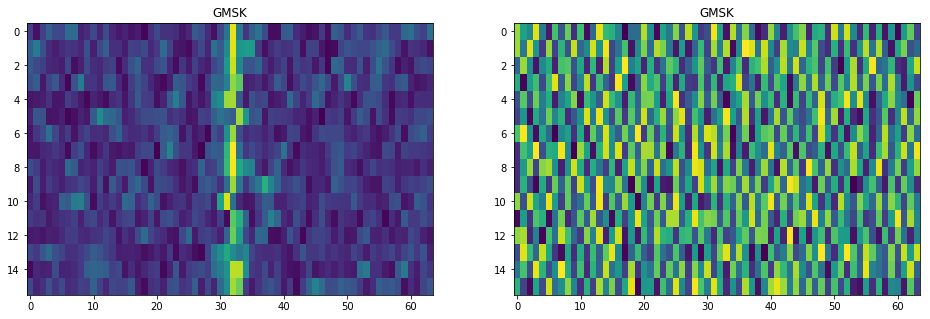

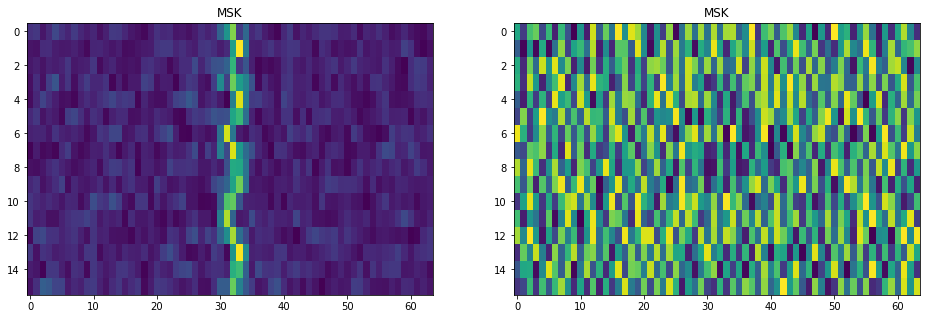

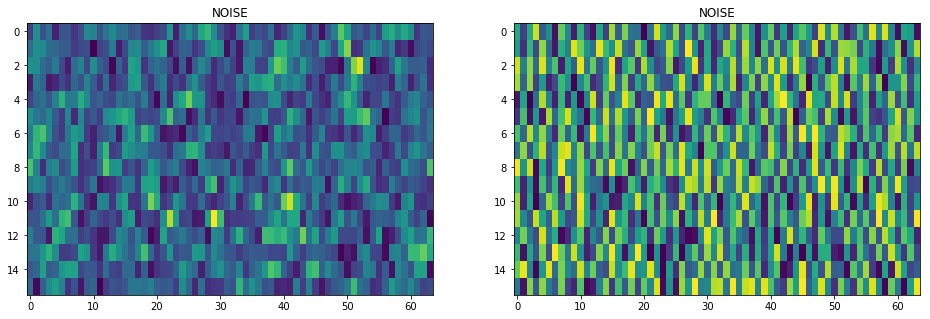

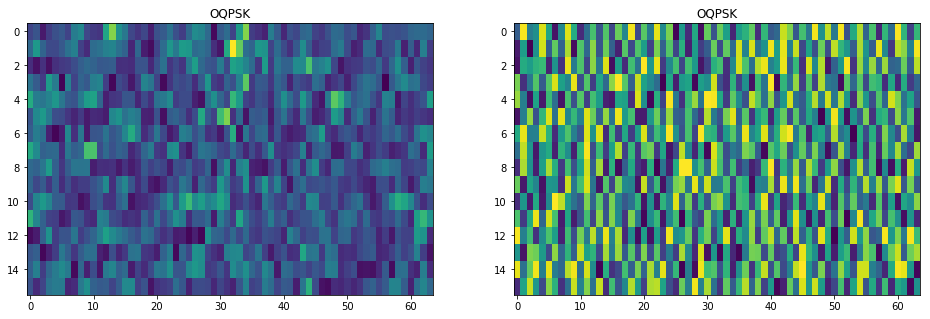

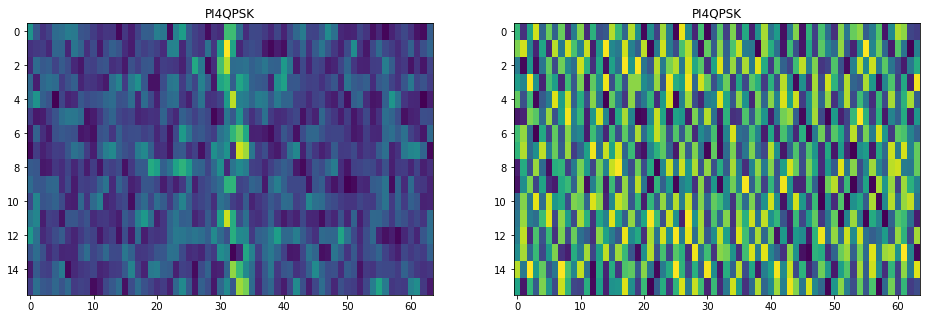

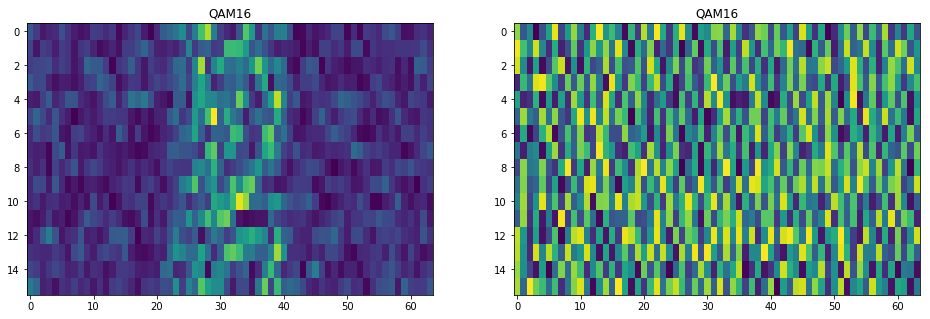

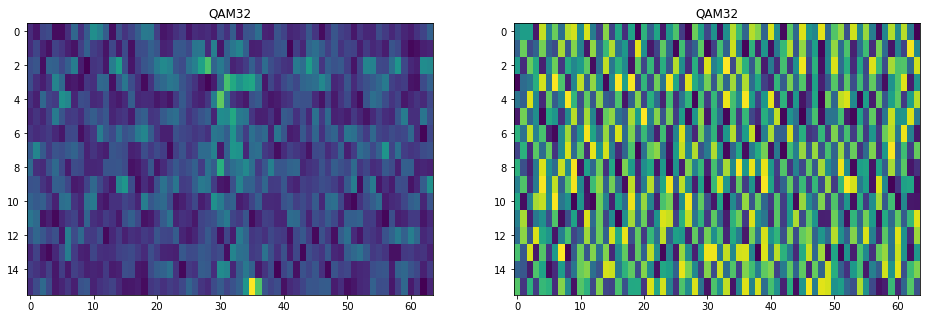

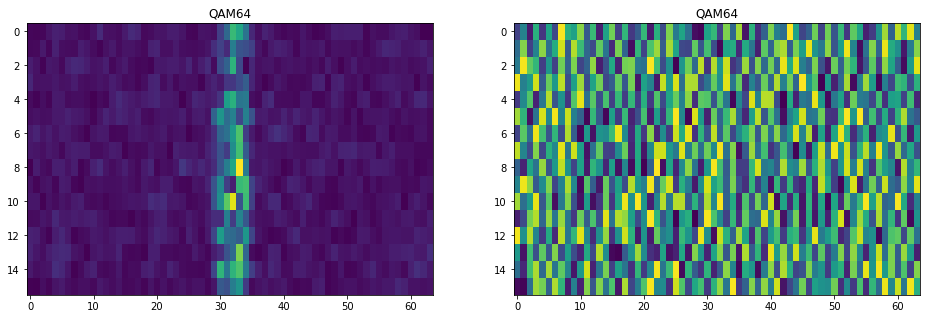

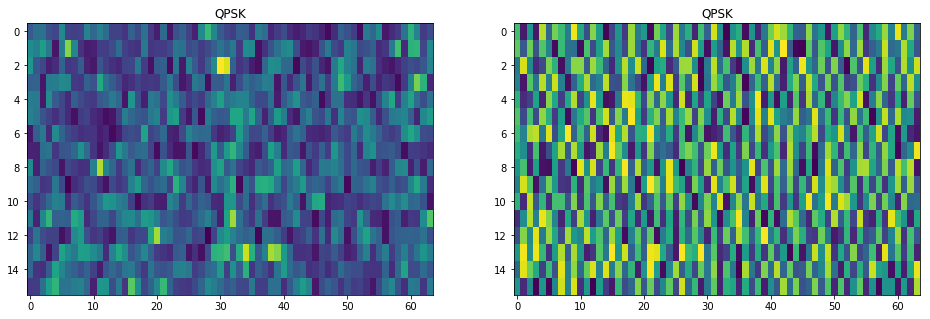

In [28]:
for modType in data.modTypes[:]:
    min_SNR = -10
    max_SNR = 10
    snr_step = 4

    # get random snr within valid range
    snrValue = random.randrange(min_SNR, max_SNR, snr_step)

    # get a collection of signals
    collection_of_instances = data.dataCube[modType, snrValue]

    # get the complex samples for a specific instance within the collection
    cdata, index = get_complex_samples_for_instance(collection_of_instances)
    print(cdata.shape,index)

    # setup inspect
    sample_rate = data.instance_shape[1]
    Ts = 1.0 / sample_rate
    t = np.arange(0, len(cdata[0])) * Ts
    window = 16
    fold = cdata.squeeze().reshape((window,1024//window))
    fold *= np.hamming(1024//window)
    ft = np.fft.fftshift(np.fft.fft(fold, axis=1))
    
    
    plt.figure(figsize=(16, 5))
    plt.subplot(121)
    plt.title(modType)
    plt.imshow(np.abs(ft), aspect='auto')
    plt.subplot(122)
    plt.title(modType)
    plt.imshow(np.angle(ft),aspect='auto')
#     plt.colorbar()
plt.show()

/home/yunfanz/miniconda3/envs/TF3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


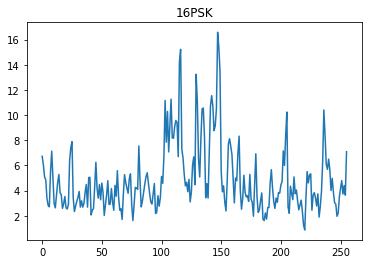

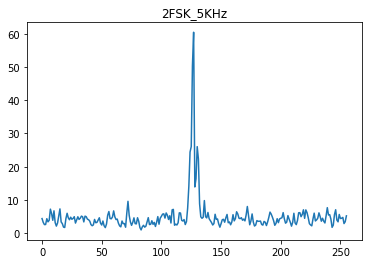

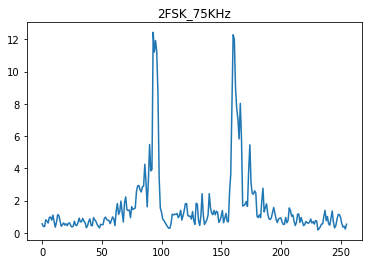

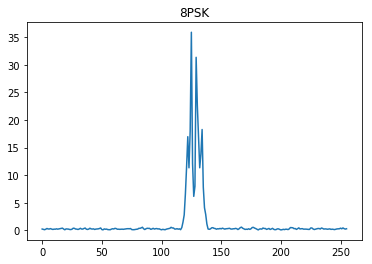

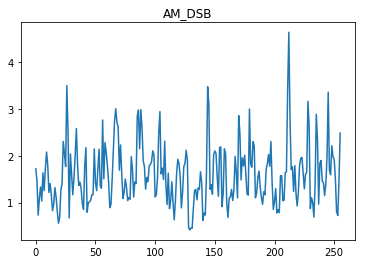

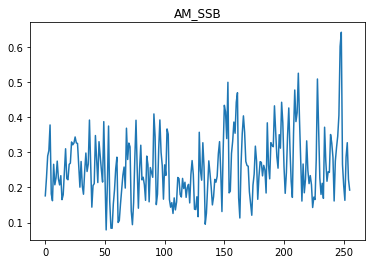

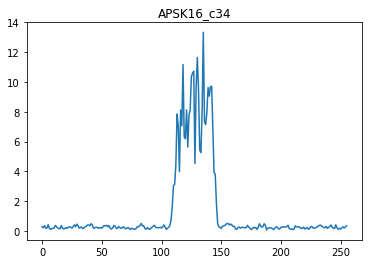

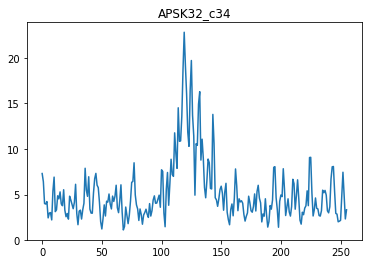

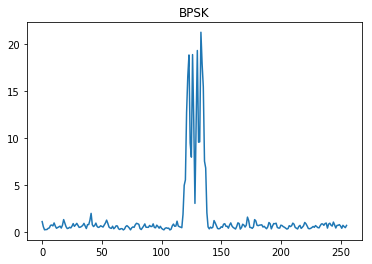

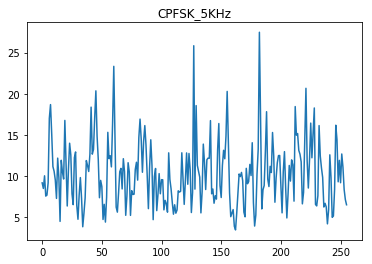

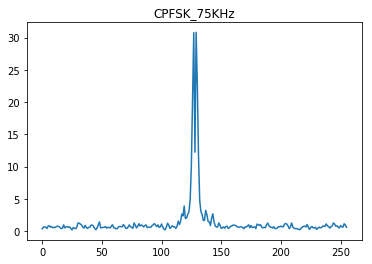

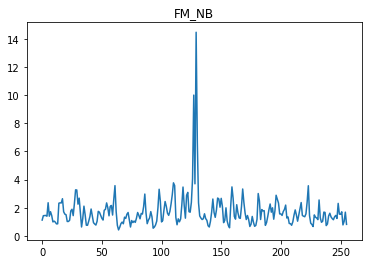

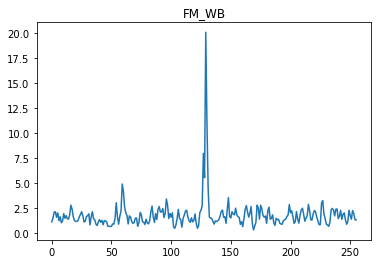

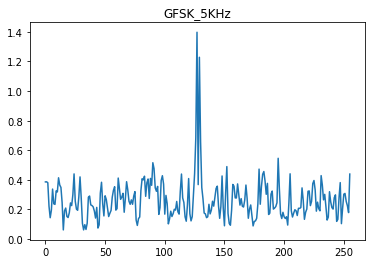

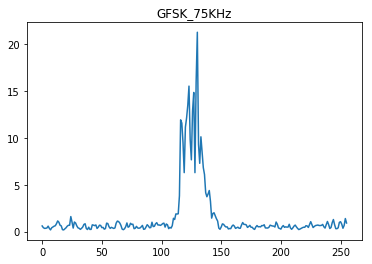

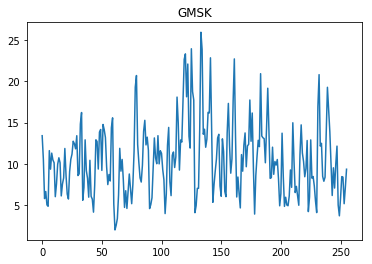

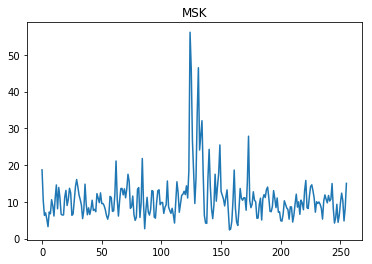

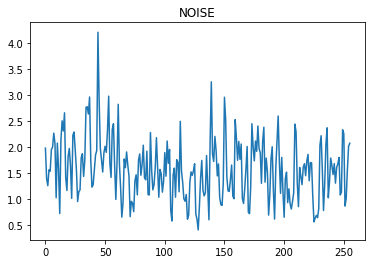

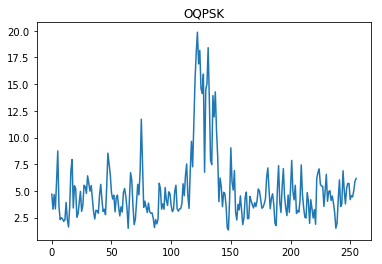

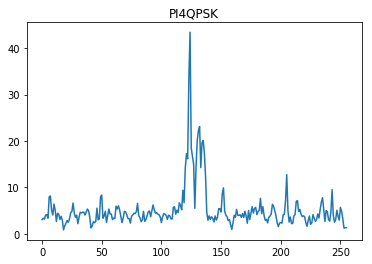

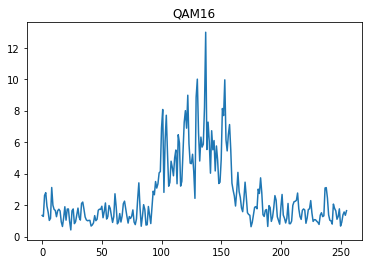

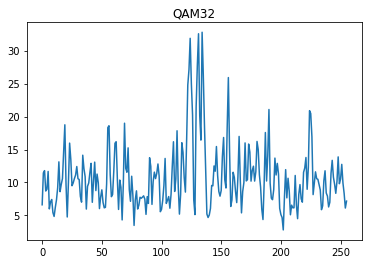

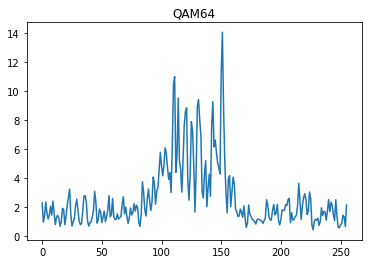

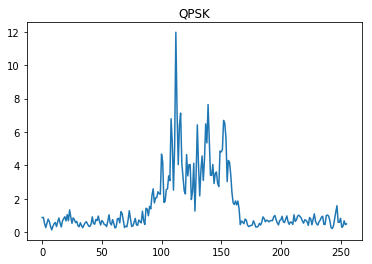

In [13]:
from scipy.signal import *
for modType in data.modTypes[:]:
    min_SNR = -10
    max_SNR = 10
    snr_step = 4

    # get random snr within valid range
    snrValue = random.randrange(min_SNR, max_SNR, snr_step)

    # get a collection of signals
    collection_of_instances = data.dataCube[modType, snrValue]

    # get the complex samples for a specific instance within the collection
    cdata, index = get_complex_samples_for_instance(collection_of_instances)
    
    _, wel_spec = welch(cdata[0], return_onesided=False, noverlap=200)
    wel_spec = np.fft.fftshift(wel_spec)
    
    
    plt.figure()
    plt.title(modType)
    plt.plot(wel_spec)
    #plt.plot(per_spec)
plt.show()

/home/yunfanz/miniconda3/envs/TF3/lib/python3.6/site-packages/scipy/signal/wavelets.py:364: ComplexWarning: Casting complex values to real discards the imaginary part
  mode='same')
/home/yunfanz/miniconda3/envs/TF3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


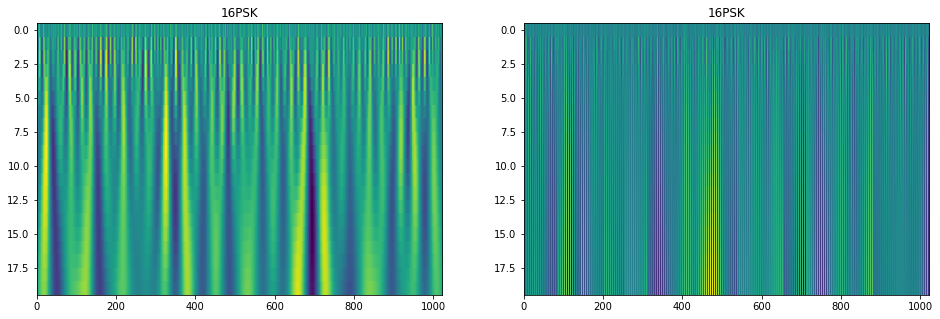

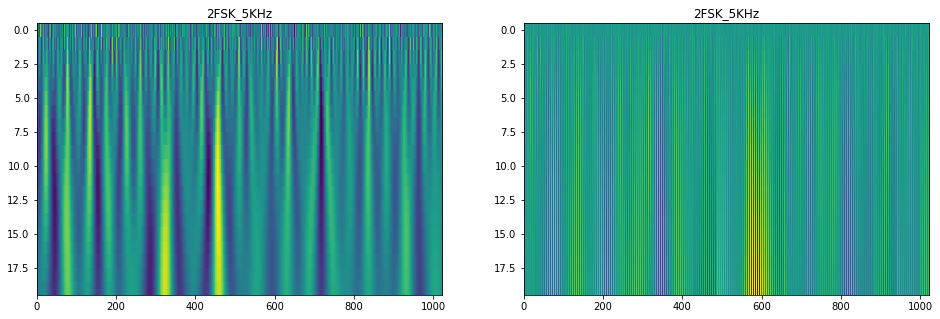

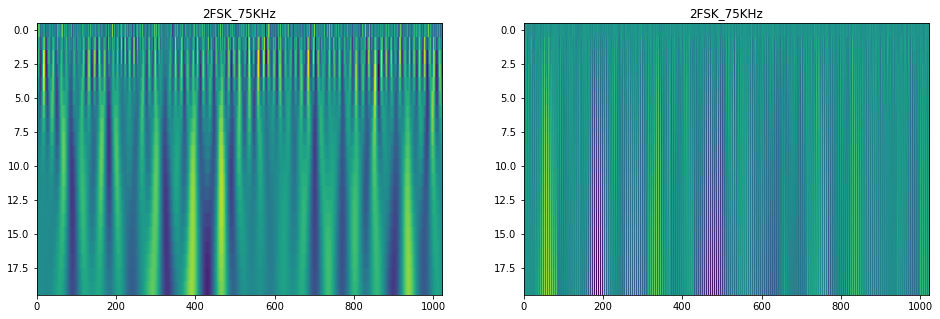

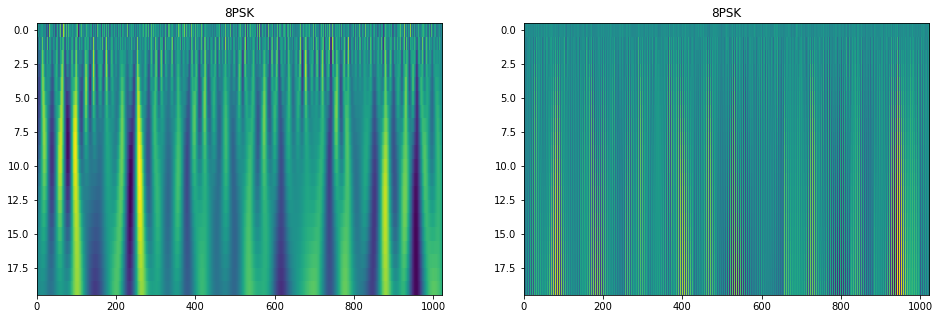

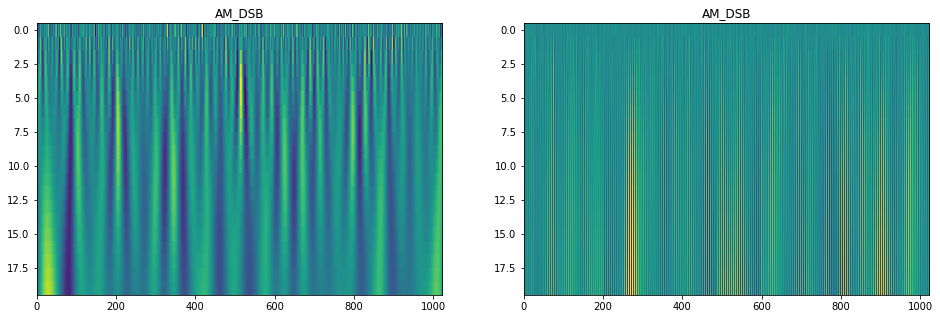

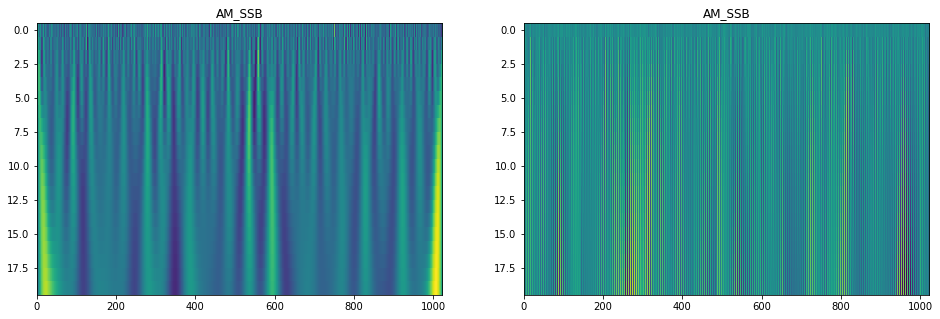

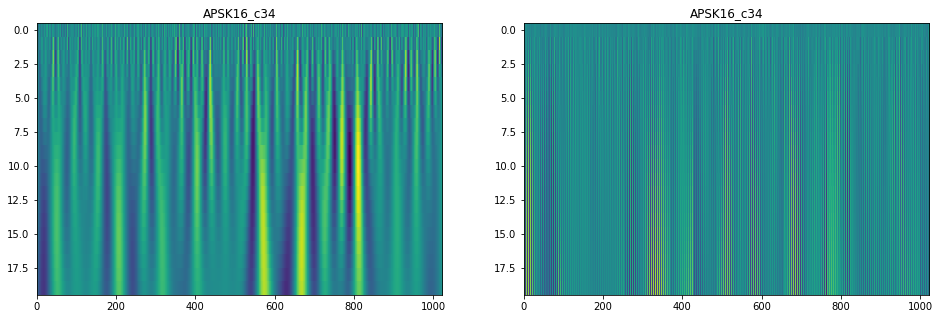

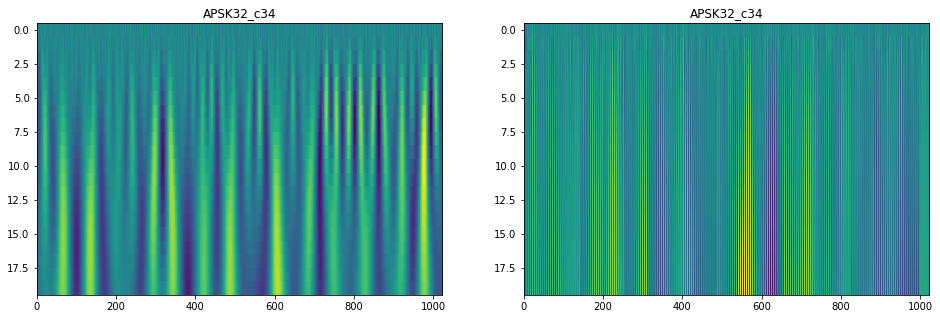

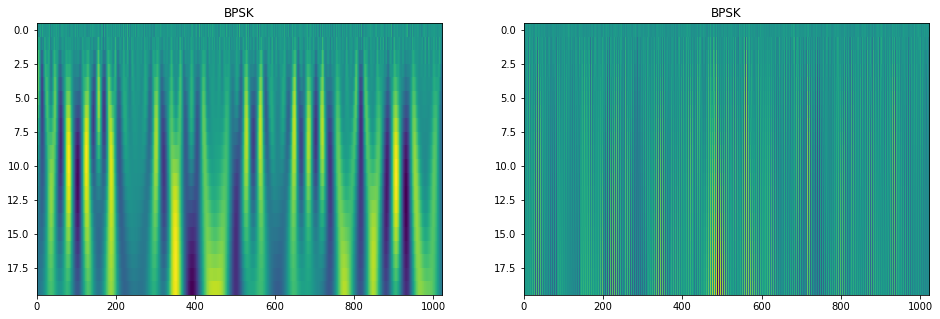

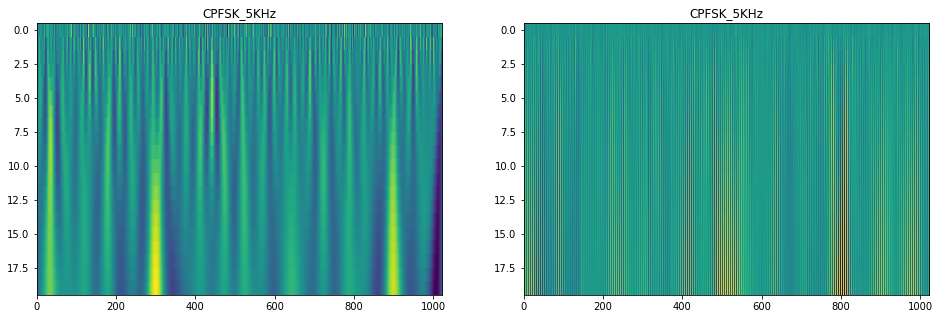

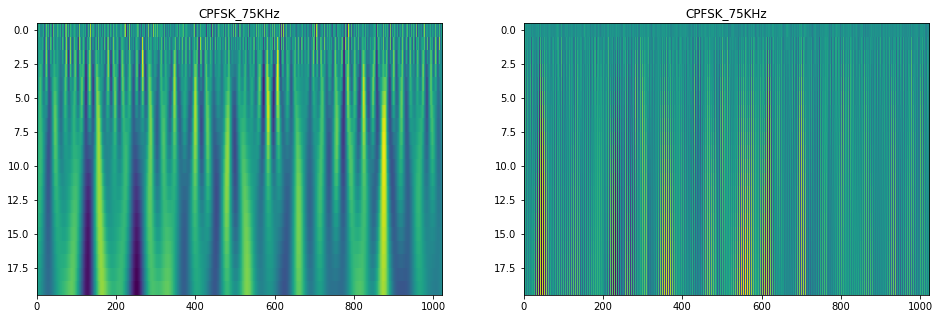

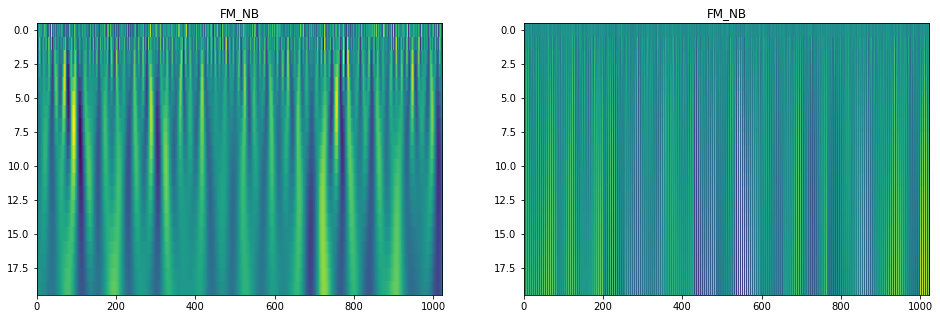

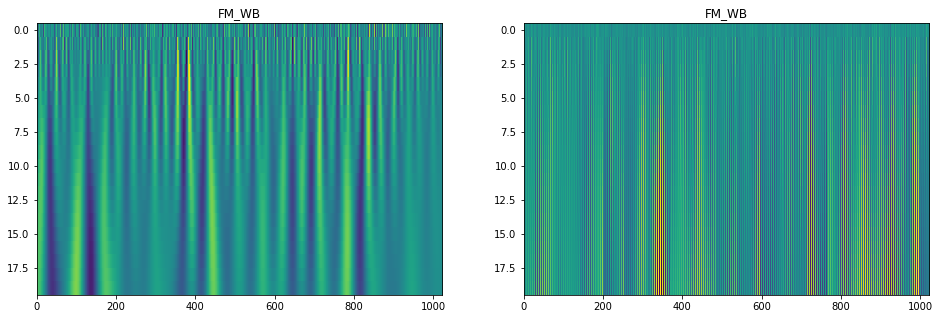

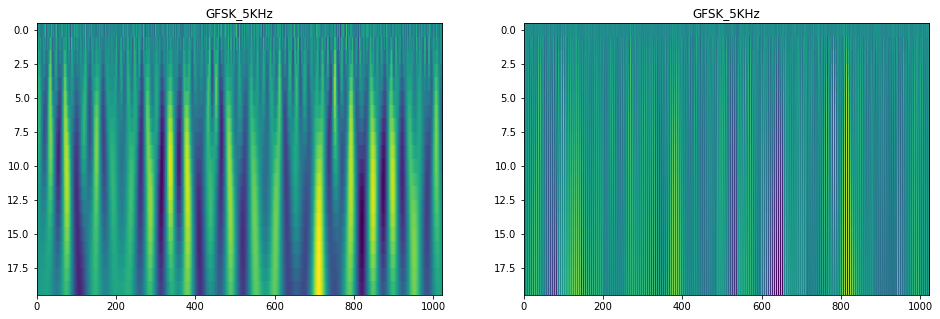

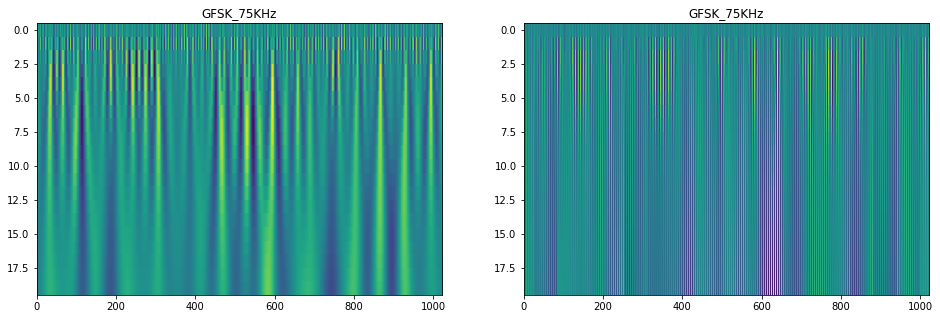

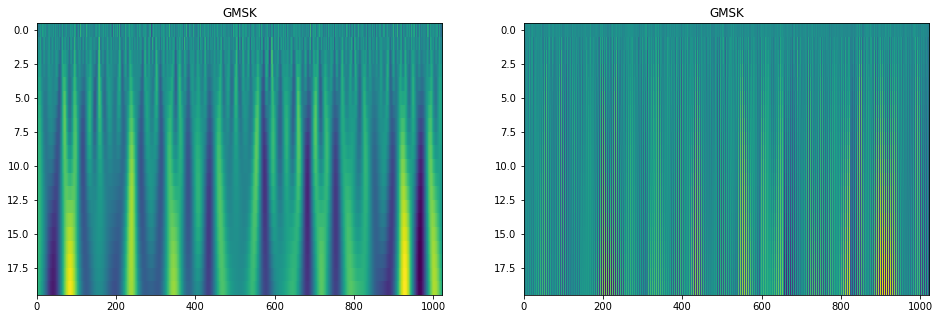

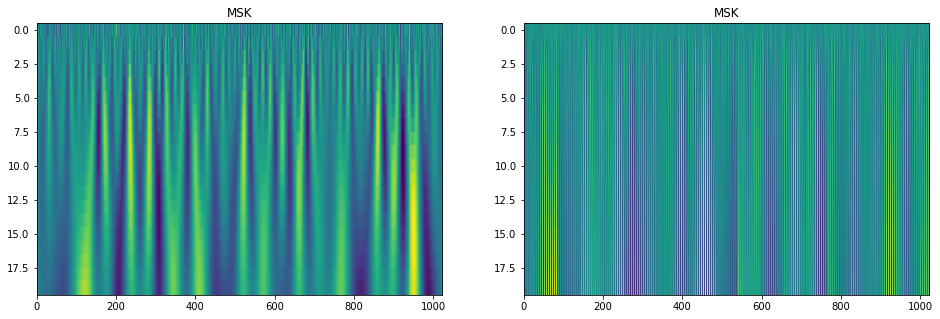

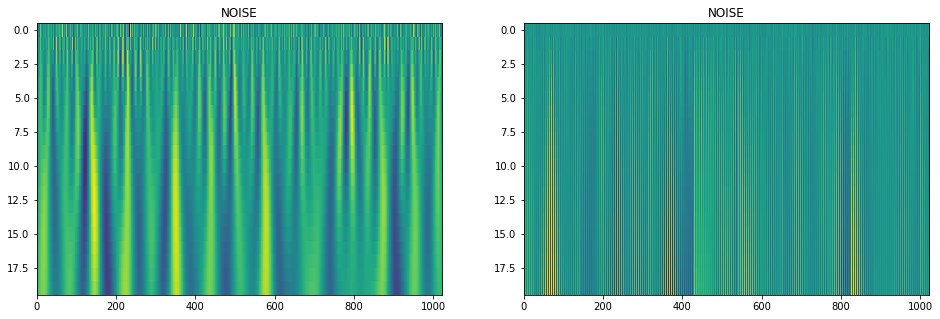

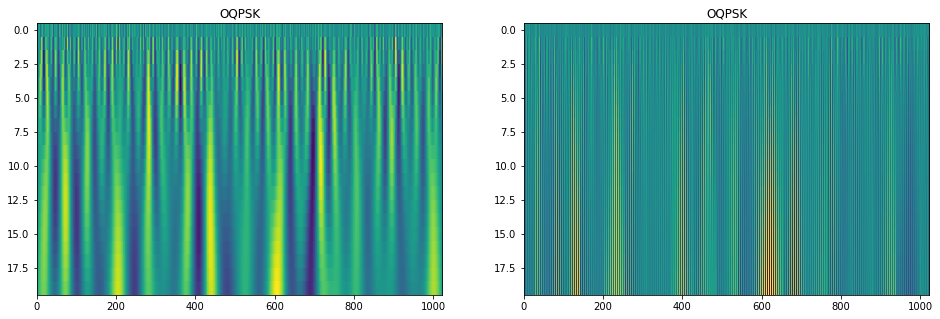

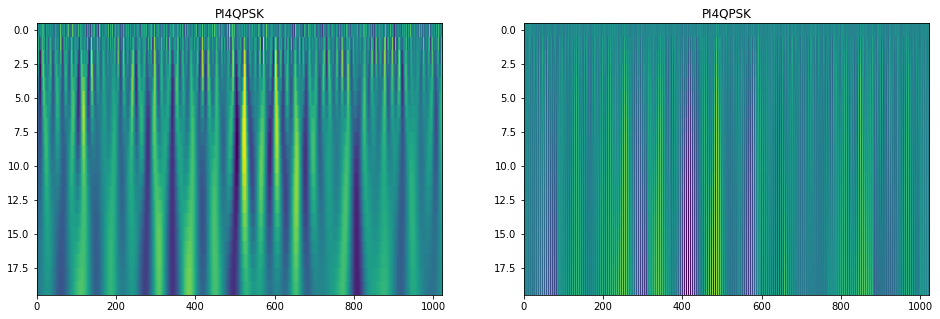

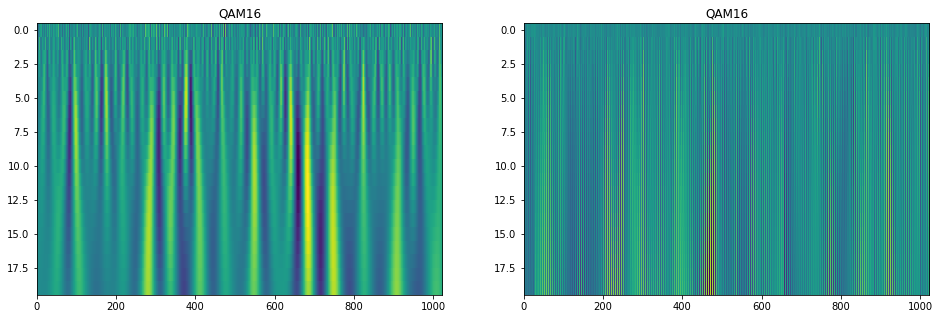

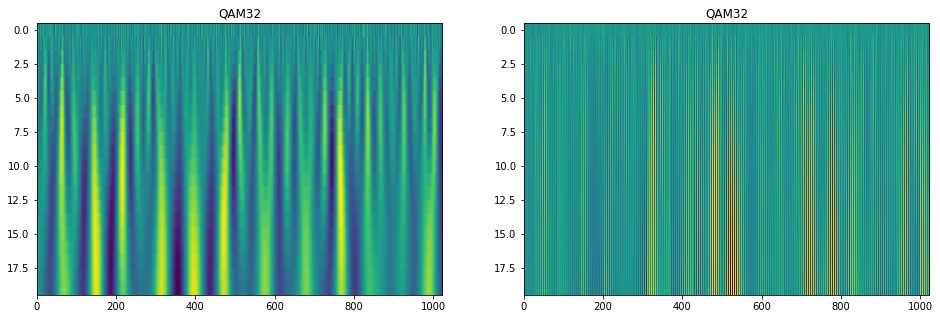

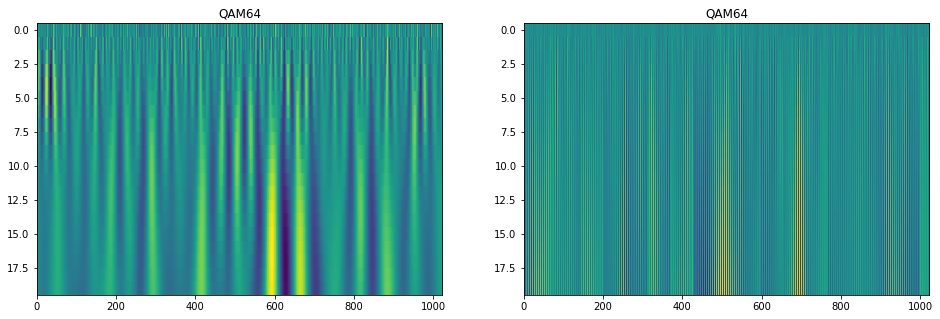

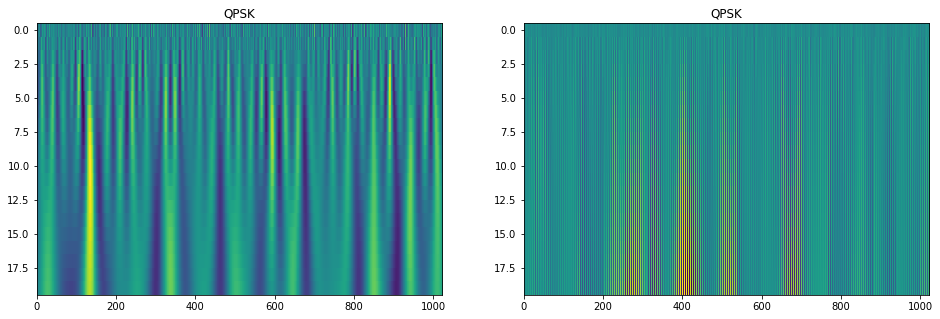

In [18]:
from scipy.signal import *
for modType in data.modTypes[:]:
    min_SNR = -10
    max_SNR = 10
    snr_step = 4

    # get random snr within valid range
    snrValue = random.randrange(min_SNR, max_SNR, snr_step)

    # get a collection of signals
    collection_of_instances = data.dataCube[modType, snrValue]

    # get the complex samples for a specific instance within the collection
    cdata, index = get_complex_samples_for_instance(collection_of_instances)
    
    widths = np.arange(1, 21)
    cwtricker = cwt(cdata[0], ricker, widths)
    cwtdaub = cwt(cdata[0], morlet, widths)
    
    
    plt.figure(figsize=(16, 5))
    plt.subplot(121)
    plt.title(modType)
    plt.imshow(cwtricker, aspect='auto', interpolation='nearest')
    plt.subplot(122)
    plt.title(modType)
    plt.imshow(cwtdaub,aspect='auto', interpolation='nearest')
plt.show()


In [22]:
x_train, y_train, x_val, y_val = get_data(mode='time_series',
                                          load_mods=['CPFSK_5KHz', 'CPFSK_75KHz', 'FM_NB', 'FM_WB', 'GFSK_5KHz'],
                                         BASEDIR='../Data/training_data/',
                                         files=[0])
print(x_train.shape)


[Data Loader] - Loading Data...
[Data Loader] - Counting Number of Examples in Dataset...
[Data Loader] - Number of Examples in Dataset: 60000
[Data Loader] - [Modulation Dataset] Adding Collects for: CPFSK_5KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: CPFSK_75KHz
[Data Loader] - [Modulation Dataset] Adding Collects for: FM_NB
[Data Loader] - [Modulation Dataset] Adding Collects for: FM_WB
[Data Loader] - [Modulation Dataset] Adding Collects for: GFSK_5KHz
[Data Loader] - Converting to numpy arrays...
[Data Loader] - Shuffling Data...
[Data Loader] - Splitting Data...
[Data Loader] - Train Size: 54000 Validation Size: 6000 Test Size: 0
[Data Loader] - Done.

(54000, 1024, 2)


In [23]:
widths = np.arange(1,21)
cwtricker_xtrain = np.stack([cwt(x_train[i,:,0]+x_train[i,:,1]*1.j, ricker, widths) for i in range(x_train.shape[0])], axis=0)
cwtmorlet_xtrain = np.stack([cwt(x_train[i,:,0]+x_train[i,:,1]*1.j, morlet, widths) for i in range(x_train.shape[0])], axis=0)
cwts = np.stack([cwtricker_xtrain, cwtmorlet_xtrain], axis=-1)
print(cwts.shape)

/home/yunfanz/miniconda3/envs/TF3/lib/python3.6/site-packages/scipy/signal/wavelets.py:364: ComplexWarning: Casting complex values to real discards the imaginary part
  mode='same')


KeyboardInterrupt: 

In [29]:
_, _, p = stft(x_train[...,0]+x_train[...,1]*1.j, noverlap=240)
print(p.shape)

/home/yunfanz/miniconda3/envs/TF3/lib/python3.6/site-packages/scipy/signal/spectral.py:1623: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


KeyboardInterrupt: 